# Week 4
# 22 February, 2023

### 1. Write the python code to perform the simple linear regression on the following datasets
### (a) Sample X-Y

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
# Generate some random data
np.random.seed(0)
x = np.random.rand(50)
y = 2 * x + 1 + np.random.rand(50)

In [2]:
# Split the data into training and testing sets
X_train,X_test,Y_train,Y_test =train_test_split(x,y,test_size = 0.2,random_state = 42)

In [3]:
# Fit a linear regression model to the training data
reg = LinearRegression()
reg.fit(X_train.reshape(-1, 1), Y_train)

# Make predictions on the testing data
pred_y = reg.predict(X_test.reshape(-1, 1))

b0 = float(reg.intercept_)
b1 = float(reg.coef_)
print("Predicted model's intercept is ",b1)
print("Predicted model's coeff is", b0)

Predicted model's intercept is  1.9826712663241797
Predicted model's coeff is 1.4442449196893703


In [4]:
# Compute the mean squared error (MSE) and root mean squared error (RMSE)
mse = mean_squared_error(Y_test, pred_y)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 0.11008768673308386
RMSE: 0.33179464542557624


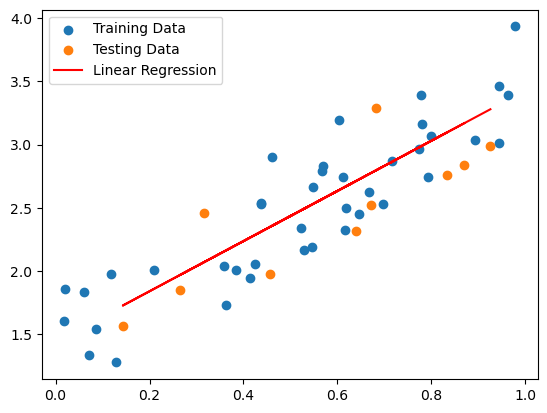

In [5]:
# Plot the data and the linear regression line
plt.scatter(X_train, Y_train, label="Training Data")
plt.scatter(X_test, Y_test, label="Testing Data")
plt.plot(X_test, pred_y, color="red", label="Linear Regression")
plt.legend()
plt.show()

### 2. Write the python code to perform the multiple linear regression on the following datasets 
### (a) Student marks

In [6]:
# Generate some random data for student marks
np.random.seed(0)
data = pd.DataFrame({'Hours': np.random.randint(1, 10, size=50),
                     'Study': np.random.randint(1, 10, size=50),
                     'Marks': np.random.randint(50, 100, size=50)})

In [7]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=0)

In [8]:
# Fit a linear regression model to the training data
reg = LinearRegression()
reg.fit(train_data[['Hours', 'Study']], train_data['Marks'])

# Make predictions on the testing data
pred_y = reg.predict(test_data[['Hours', 'Study']])

In [9]:
# Compute the mean squared error (MSE) and root mean squared error (RMSE)
mse = mean_squared_error(test_data['Marks'], pred_y)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 217.7139104586422
RMSE: 14.75513166524251


Coefficient 1: -0.4455621477013592
Coefficient 2: 0.09306607172825
The regression model is : Marks = 74.7216 + -0.4456 * Hours + 0.0931 * Study


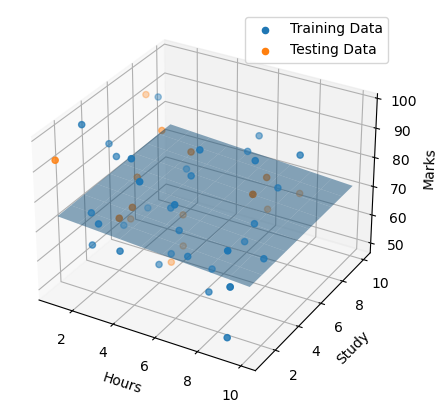

In [10]:
# Plot the data and the linear regression line
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data['Hours'], train_data['Study'], train_data['Marks'], label="Training Data")
ax.scatter(test_data['Hours'], test_data['Study'], test_data['Marks'], label="Testing Data")
x = np.linspace(1, 10, 10)
y = np.linspace(1, 10, 10)
X, Y = np.meshgrid(x, y)
print("Coefficient 1:",reg.coef_[0])
print("Coefficient 2:",reg.coef_[1])
print('The regression model is : Marks = {} + {} * Hours + {} * Study'.format(round(reg.intercept_,4),round(reg.coef_[0],4),round(reg.coef_[1],4))) 
Z = reg.intercept_ + reg.coef_[0] * X + reg.coef_[1] * Y
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_xlabel('Hours')
ax.set_ylabel('Study')
ax.set_zlabel('Marks')
plt.legend()
plt.show()